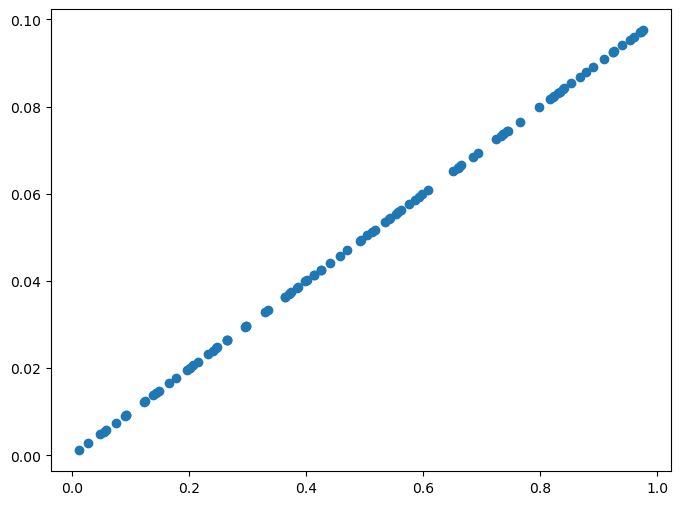

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.random.rand(100)
y = 0.2 * X * 0.5 # y= 0.2 x 0.5

plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.show()

In [2]:
def plt_prediction(pred,y):
    plt.figure(figsize=(8,6))
    plt.scatter(X,y, color='blue', label='Actual')
    plt.scatter(X,pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

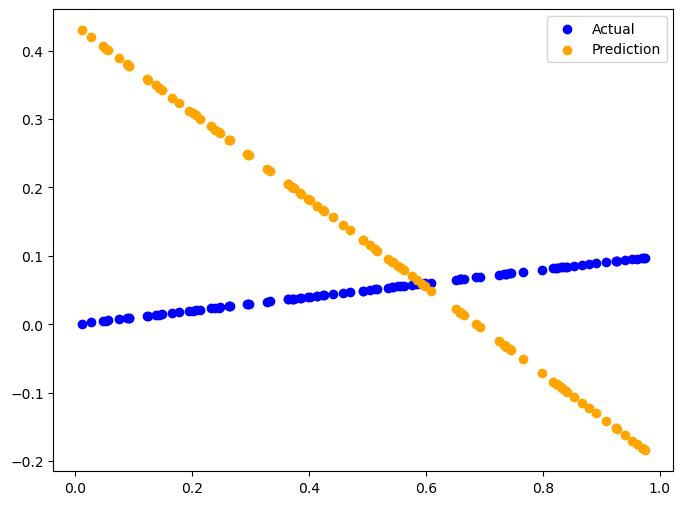

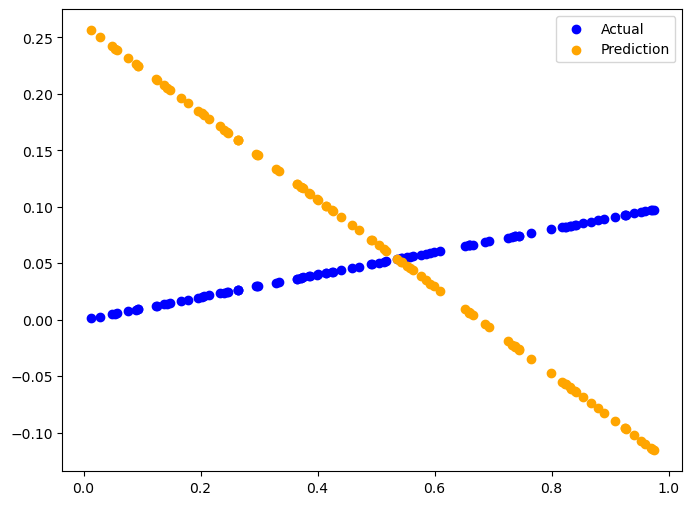

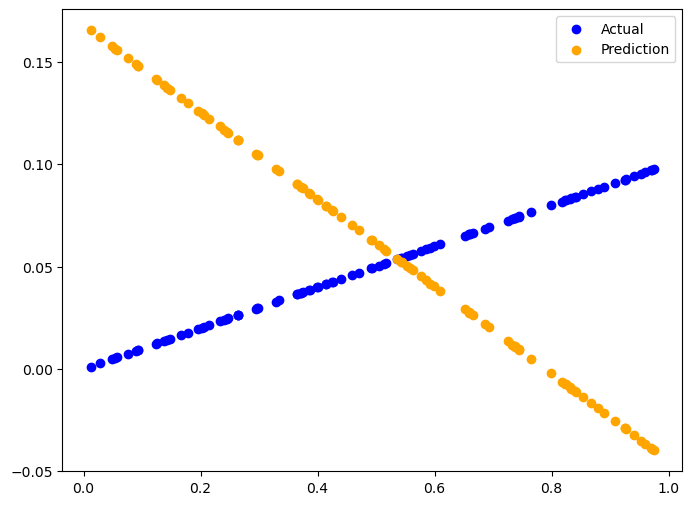

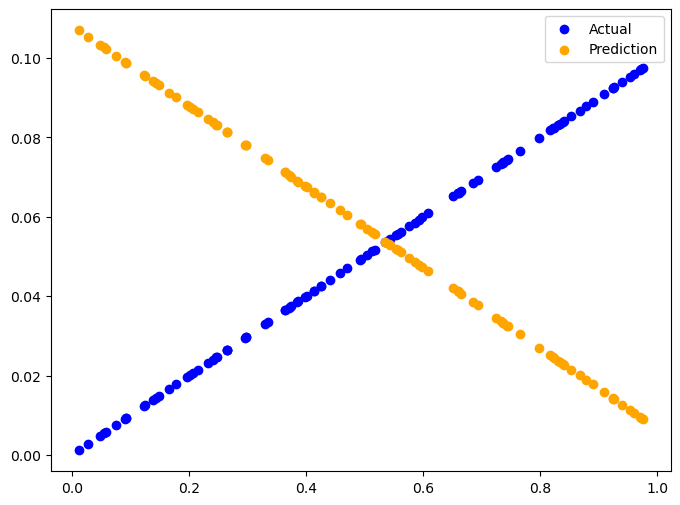

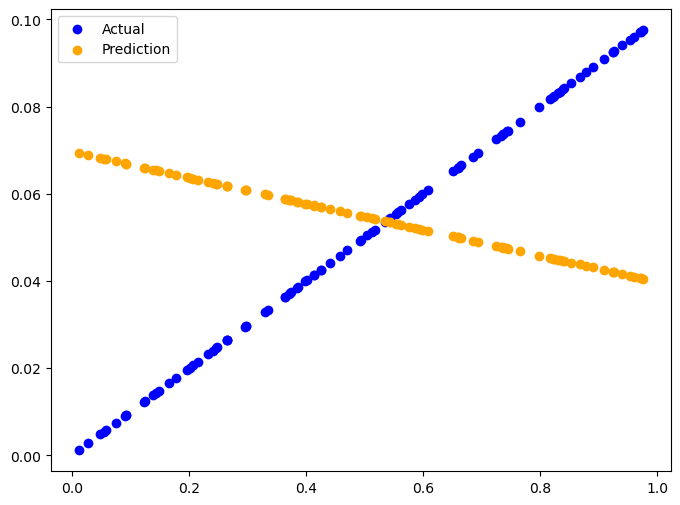

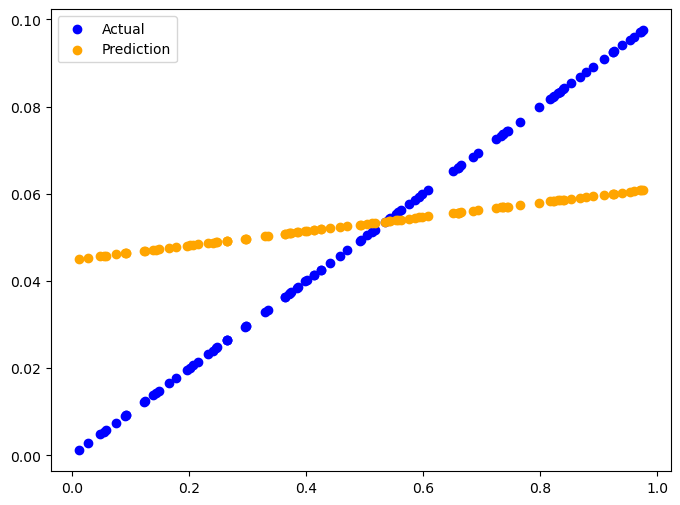

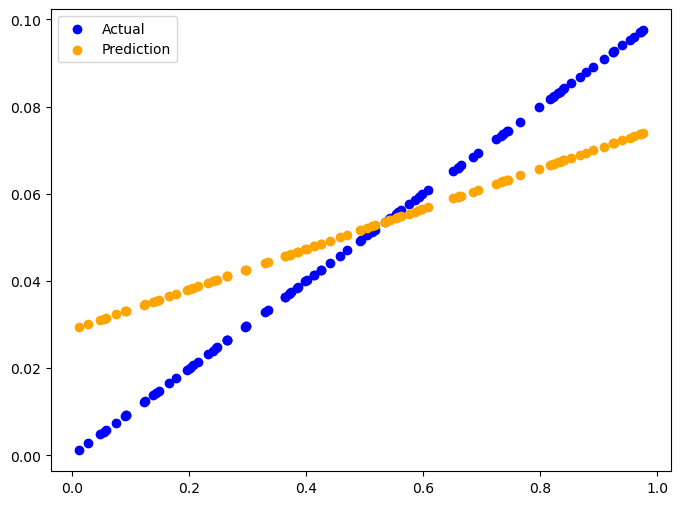

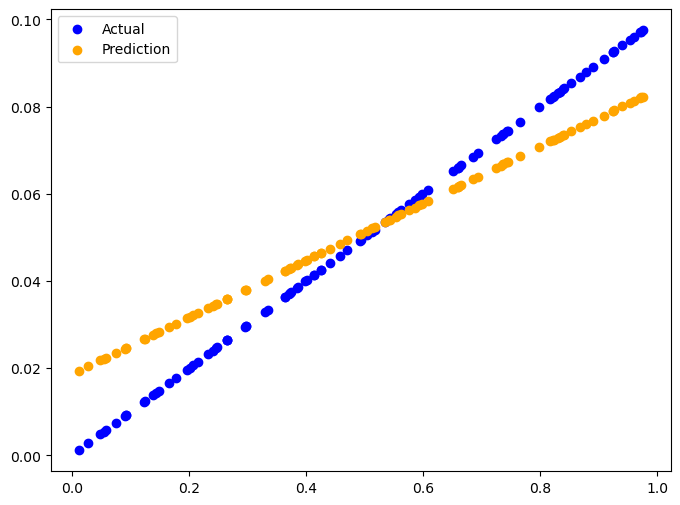

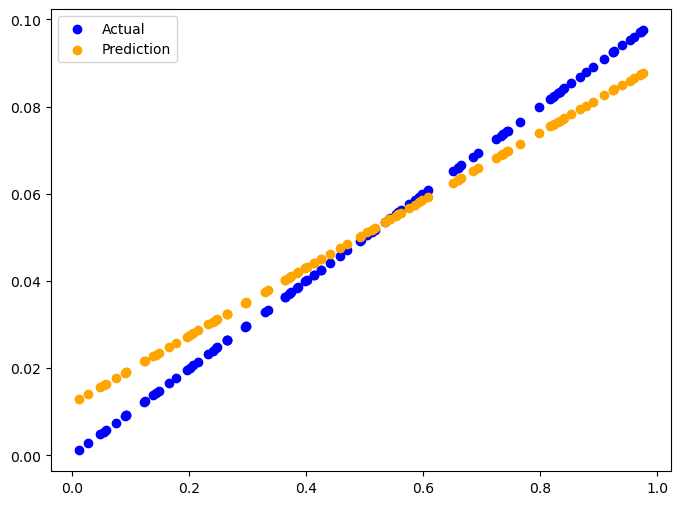

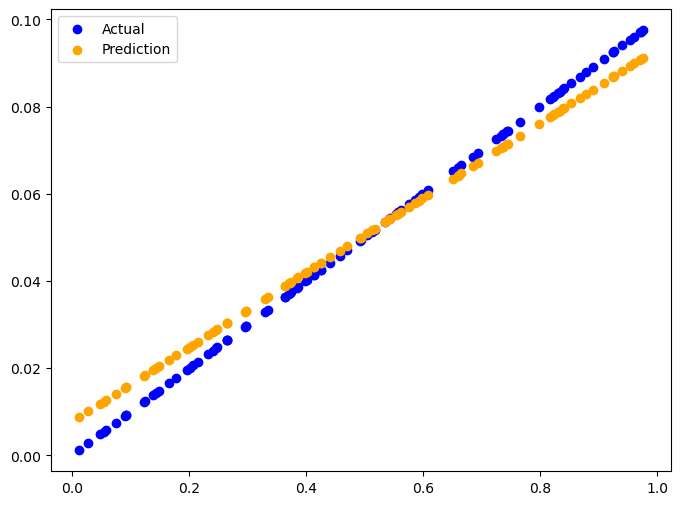

In [3]:
# 단순경사하강법 y = wx + b

#가중치의 초기값
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.7

for epoch in range(100):
    y_pred = W * X + b # 예측함수
    error = np.abs(y_pred - y).mean() #손실함수 - 절대값
    if error<0.001:
        break # 오차가 0에 가까워지면 반복 종료

    #새로운 W를 찾는다 > 오차 > 기울기 계산 > 학습율 적용 > W_update, b_update
    W_descent = learning_rate* ((y_pred - y)*X).mean()
    b_descent = learning_rate* (y_pred - y).mean()

    W = W - W_descent #기울기의 반대방향으로 적용
    b = b - b_descent

    if epoch % 10 == 0:
        y_pred = W * X + b
        plt_prediction(y_pred, y)



# LinearRegression을 이용한 보스턴 주택 가격 측정

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#boston 데이터 세트 로드
boston = load_boston()

#boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격임. 이를 price 컬럼으로 dataframe 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


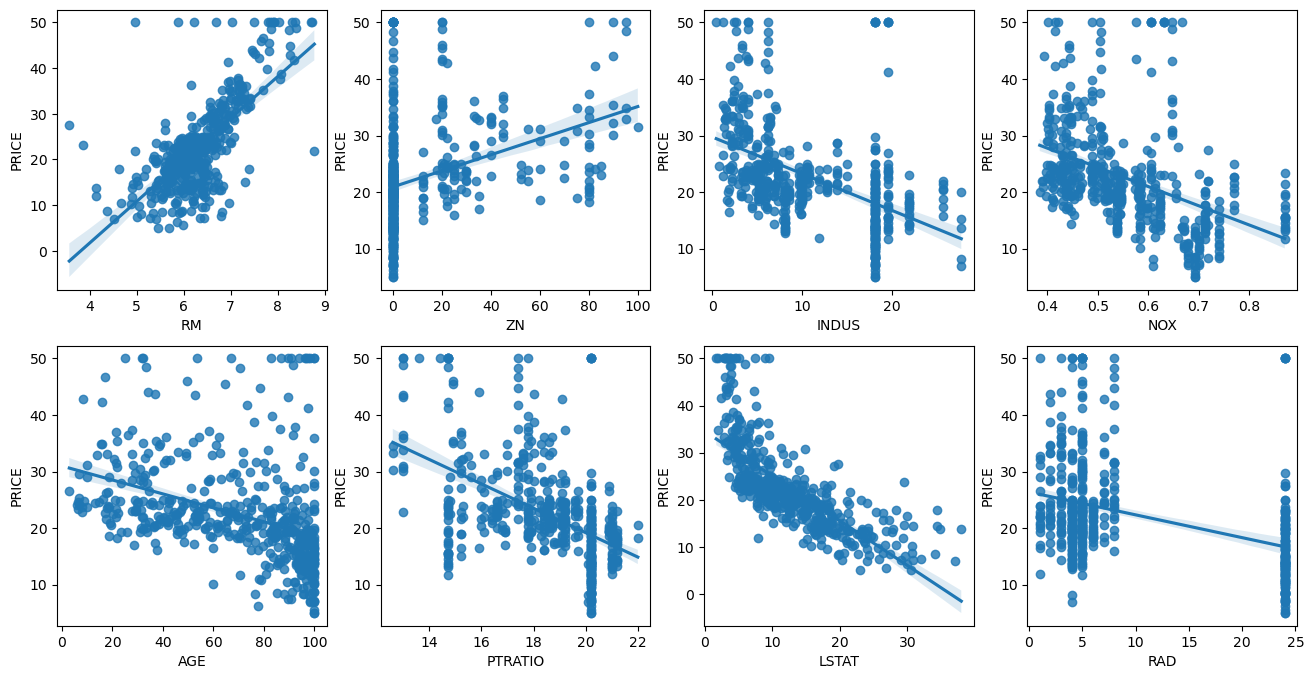

In [5]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col=i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')
print(f'Variance score: {r2_score(y_test, y_preds)}')



MSE: 17.29691590790211, RMSE: 4.15895610795571
Variance score: 0.7572263323138927


In [7]:
print('절편값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편값: 40.99559517216442
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [8]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [9]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace= False)

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data,y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f'5 folds 의 평균 RMSE : {avg_rmse:.3f}')

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829


# 다항 회귀와 과(대)적합/과소적합 이해

## PolynomialFeatures 클래스로 다항식 변환

In [30]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X= np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

#degree = 2인 2차 다항식으로 변화하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변화된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변화된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [11]:
def polynomial_func(X):
    y = 1+ 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


## 3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습

In [31]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature 와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [-0.    0.18  0.18  0.36  0.54  0.72  0.72  1.08  1.62  2.34]
Polynomial 회귀 Shape : (10,)


## 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습


In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [-0.    0.18  0.18  0.36  0.54  0.72  0.72  1.08  1.62  2.34]


## 다항 회귀를 이용한 과소적합 및 과적합 이해

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

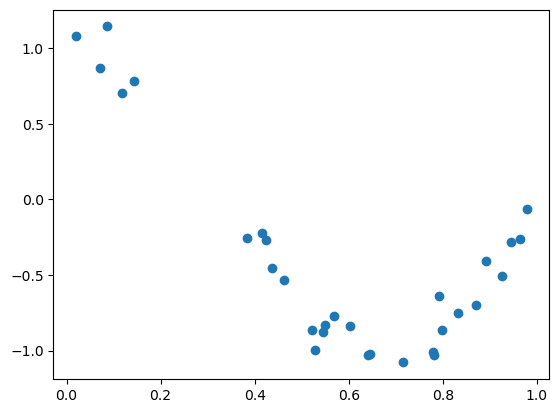

In [34]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987231737 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899370e+05 -1.87416114e+06  2.03716252e+07
 -1.44873341e+08  7.09315818e+08 -2.47066009e+09  6.24561742e+09
 -1.15676664e+10  1.56895176e+10 -1.54006289e+10  1.06457467e+10
 -4.91378551e+09  1.35919950e+09 -1.70381195e+08] 입니다.
Degree 15 MSE 는 182618860.9149443 입니다.


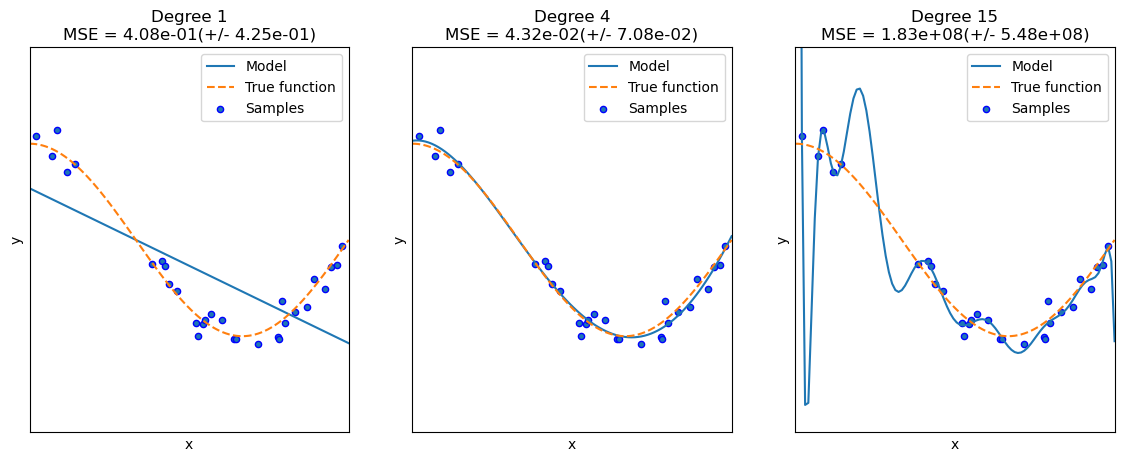

In [35]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
          
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

# 릿지 회귀

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha = 10 으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f'5 folds 의 평균 RMSE : {avg_rmse:.3f}')

5 folds 의 개별 Negative MSE scores:  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds 의 개별 RMSE scores :  [3.38 4.93 5.31 8.64 5.34]
5 folds 의 평균 RMSE : 5.518


In [15]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'alpha {alpha} 일 때 5 folds의 평균 RMSE: {avg_rmse}')

alpha 0 일 때 5 folds의 평균 RMSE: 5.828658946215806
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.788486627032411
alpha 1 일 때 5 folds의 평균 RMSE: 5.652570965613546
alpha 10 일 때 5 folds의 평균 RMSE: 5.518166280868971
alpha 100 일 때 5 folds의 평균 RMSE: 5.329589628472148


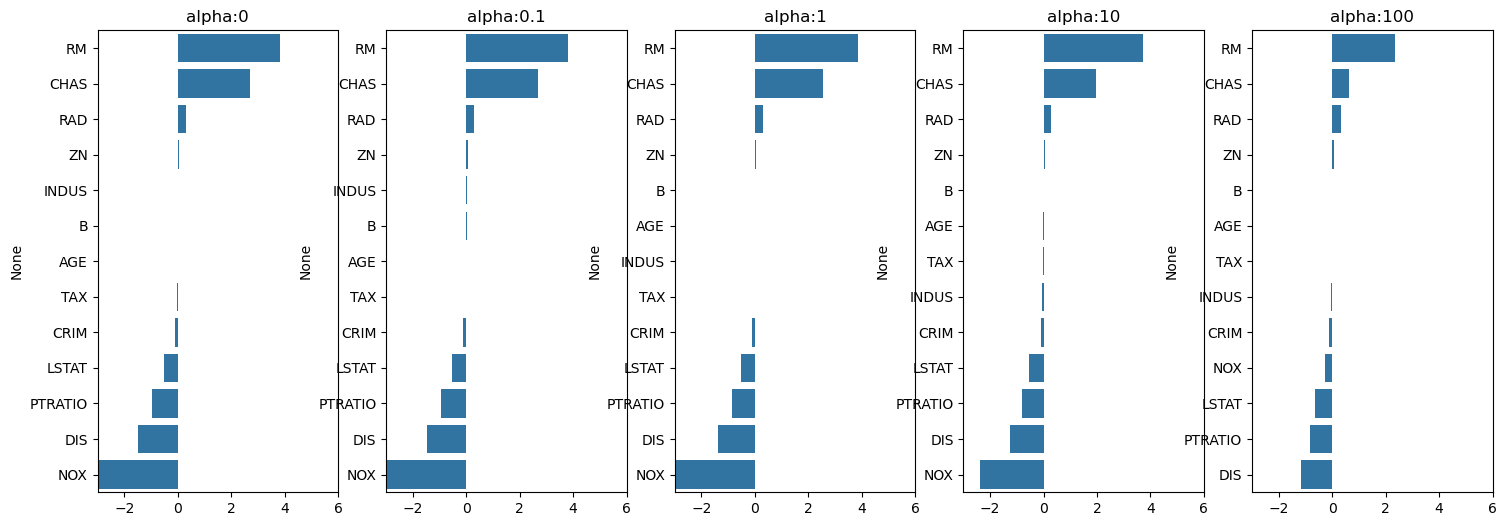

In [16]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()



In [17]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


# 라쏘 회귀

In [18]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'alpha {param} 일 때 5 폴드 세트의 평균 RMSE: {avg_rmse}')
        # cross_val_score 는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n, y_target_n)
        if return_coeff:
            #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df

#end of get_liner_reg_eval

# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)


###### Lasso ######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 5.612284267526674
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.6151160352669365
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 5.6691234095948975
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.776020813823375
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 6.1887632108009045


In [20]:
# 반환된 coeff_lasso_df를 첫 번째 컬럼 순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


# 엘라스틱넷 회귀

In [21]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 5.54165434734814
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.525928496294909
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 5.466748649445586
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.596874445109749
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 6.068121638621163


In [22]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


# 선형 회귀 모델을 위한 데이터 변환

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method =='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data


In [24]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print(f'\n## 변환 유형:{scale_method[0]}, Polynomial Degree:{scale_method[1]}')
    
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.788486627032411
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.652570965613546
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.518166280868971
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 5.329589628472148
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.825992799389445
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.8028895172577375
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.636831222559071
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 5.421374711794967
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 8.82723587300141
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 6.871287525962285
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.484870425533333
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 4.634437778261923
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.763570225288303
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.465045081564938
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.754163637679423
alpha 100 일 때 5 폴드

In [25]:
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print(f'\n## 변환 유형:{scale_method[0]}, Polynomial Degree:{scale_method[1]}')
    
    get_linear_reg_eval('Lasso', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.6151160352669365
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.776020813823375
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 6.585731788106536
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 8.393274554563755
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.657688688300818
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 6.0781801294918925
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 9.558336445133076
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 9.558336445133076
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.185111986780868
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 4.978940116414007
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 9.557025774589137
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 9.558336445133076
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.905511057018139
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 8.547669939218723
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 9.558336445133076
alpha 100 일 때 5 

In [27]:
# 전체 코드

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import numpy as np
import pandas as pd

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True, l1_ratios=None):
    coeff_df = pd.DataFrame()
    if l1_ratios is None:
        l1_ratios = [0.7]  # ElasticNet 기본값
    
    if verbose: print('######', model_name, '######')
    for param in params:
        for l1_ratio in l1_ratios:
            if model_name == 'Ridge':
                model = Ridge(alpha=param)
            elif model_name == 'Lasso':
                model = Lasso(alpha=param)
            elif model_name == 'ElasticNet':
                model = ElasticNet(alpha=param, l1_ratio=l1_ratio, max_iter=10000)

            # 교차 검증으로 평균 RMSE 계산
            neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
            avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
            print(f'alpha {param}, l1_ratio {l1_ratio if model_name == "ElasticNet" else "-"} 일 때 5 폴드 세트의 평균 RMSE: {avg_rmse}')
            
            # 회귀 계수 추출
            model.fit(X_data_n, y_target_n)
            if return_coeff:
                coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
                colname = f'alpha:{param}, l1_ratio:{l1_ratio}' if model_name == 'ElasticNet' else f'alpha:{param}'
                coeff_df[colname] = coeff
    return coeff_df

# 데이터 변환 함수
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree is not None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

# 데이터 준비
from sklearn.datasets import load_boston
boston = load_boston()
X_data = pd.DataFrame(boston.data, columns=boston.feature_names)
y_target = boston.target

# 하이퍼파라미터 정의
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]  # ElasticNet 전용

# 데이터 변환 방법 설정
scale_methods = [
    (None, None),
    ('Standard', None),
    ('Standard', 2),
    ('MinMax', None),
    ('MinMax', 2),
    ('Log', None),
    ('Log', 1), 
    ('Log', 2)
]

# Ridge, Lasso, ElasticNet 모델 평가
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print(f"\n## 변환 유형: {scale_method[0]}, Polynomial Degree: {scale_method[1]}")
    
    print("\n### Ridge Regression ###")
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, return_coeff=False)

    print("\n### Lasso Regression ###")
    get_linear_reg_eval('Lasso', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, return_coeff=False)

    print("\n### ElasticNet Regression ###")
    get_linear_reg_eval('ElasticNet', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, return_coeff=False, l1_ratios=l1_ratios)




## 변환 유형: None, Polynomial Degree: None

### Ridge Regression ###
###### Ridge ######
alpha 0.001, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 5.828193445914249
alpha 0.01, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 5.824069718677496
alpha 0.1, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 5.788486627032407
alpha 1, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 5.652570965613543
alpha 10, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 5.5181662808689715
alpha 100, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 5.3295896284721485

### Lasso Regression ###
###### Lasso ######
alpha 0.001, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 5.818714501757486
alpha 0.01, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 5.740405503771288
alpha 0.1, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 5.6151160352669365
alpha 1, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 5.776020813823377
alpha 10, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 6.585731788106536
alpha 100, l1_ratio - 일 때 5 폴드 세트의 평균 RMSE: 8.393274554563755

### ElasticNet Regression ###
###### ElasticNet ######
alpha 0.001, l1_ratio 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.72149881927752

KeyboardInterrupt: 

In [ ]:
#from a classmate -- 2.9251812022408346
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

# 알파 값 설정 (Ridge, Lasso, ElasticNet 모두 동일)
alphas = [0.1, 1, 10, 100]

#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]

# 모델 종류 설정
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# 모델을 순차적으로 적용하고 평가하기
for model_name, model in models.items():
    # scale_methods는 다양한 데이터 스케일링 방법을 설정한 리스트로, 각 방법에 대해 모델을 학습
    for scale_method in scale_methods:
        # get_scaled_data()는 스케일링 방법(method)과 다항식 특성의 차수(p_degree)를 적용하여 데이터를 변환하는 함수.
        X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                        input_data=X_data)
        print('\n## 변환 유형:{0}, Polynomial Degree:{1}, Model: {2}'.format(scale_method[0], scale_method[1], model_name))
        print(X_data_scaled.shape, X_data.shape)
        
        # Ridge, Lasso, ElasticNet 모델에 대한 하이퍼파라미터 튜닝 (알파값)
        if model_name == 'ElasticNet':
            # ElasticNet의 경우 alpha 외에도 l1_ratio도 조정 가능
            # l1_ratio: Lasso와 Ridge의 혼합 비율로, 0이면 Ridge 회귀, 1이면 Lasso 회귀.
            # ElasticNet은 Lasso와 Ridge 회귀를 결합한 모델이기 때문에 두 모델의 비율을 설정하는 역할을 한다.
            params = {'alpha': alphas, 'l1_ratio': [0.1, 0.5, 0.9, 1.0]}
        else:
            params = {'alpha': alphas}
        
        grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)
        grid_search.fit(X_data_scaled, y_target)
        
        best_model = grid_search.best_estimator_
        print(f"Best model :{model_name}: {best_model}")
        
        # RMSE 출력
        rmse = np.sqrt(mean_squared_error(y_target, best_model.predict(X_data_scaled)))
        print(f"RMSE : {model_name}, {scale_method[0]}, {scale_method[1]} = {rmse}")


## 변환 유형:None, Polynomial Degree:None, Model: Ridge
(506, 13) (506, 13)
Best model :Ridge: Ridge(alpha=100)
RMSE : Ridge, None, None = 4.880344487985698

## 변환 유형:Standard, Polynomial Degree:None, Model: Ridge
(506, 13) (506, 13)
Best model :Ridge: Ridge(alpha=100)
RMSE : Ridge, Standard, None = 4.857950586253095

## 변환 유형:Standard, Polynomial Degree:2, Model: Ridge
(506, 104) (506, 13)
Best model :Ridge: Ridge(alpha=100)
RMSE : Ridge, Standard, 2 = 3.129863083165314

## 변환 유형:MinMax, Polynomial Degree:None, Model: Ridge
(506, 13) (506, 13)
Best model :Ridge: Ridge(alpha=1)
RMSE : Ridge, MinMax, None = 4.704223951356012

## 변환 유형:MinMax, Polynomial Degree:2, Model: Ridge
(506, 104) (506, 13)
Best model :Ridge: Ridge(alpha=1)
RMSE : Ridge, MinMax, 2 = 3.3625344096253778

## 변환 유형:Log, Polynomial Degree:None, Model: Ridge
(506, 13) (506, 13)
Best model :Ridge: Ridge(alpha=1)
RMSE : Ridge, Log, None = 4.27227801352288

## 변환 유형:None, Polynomial Degree:None, Model: Lasso
(506, 13) (506, 1